Introduction:
-

Receiving approval for a credit card requires the satisfaction of very specific requirements. Although employment and income are considered the most influential factors in determining an applicant’s approval, other personal factors might influence an applicant’s approval in unexpected ways. 
In our project proposal, we are seeking to determine the effects of personal factors on the approval of credit card applications.  Specifically, our research question is “What will be the approval status of an individual’s credit card based on their age and debt?” To answer this question, the “Credit Card Approvals” dataset, owned by Samuel Cortinhas, will be used. This dataset includes the personal information of individuals who submitted credit card applications. The dataset is divided into the following columns: Gender, Age, Ethnicity, Debt, Marital Status, Bank Customer, Industry, Years Employed, Prior Default, and Employment.


Methods:
-

To conduct the data analysis, we will download the dataset from Kaggle and then tidy it. We will ensure that all values and titles are legible and understandable. Then, we will split the data into training and testing sets, and use cross-validation to determine the best K value. From there, we will build a classification model using the training set. We will use age and debt as the predictor variables because they are quantitative and have variations in values (ie. not binary values), which make them ideal for our model. Finally, we will test and visualize our model using our testing data set. As the model predicts the approval class for the new observation, it can then predict whether or not an applicant will get approved based on their age and debt.

Our results will be visualized as a scatterplot, with the colors of each point being indicative of approval status. Our two predictor variables, age and debt, will serve as our X and Y axes, with the approval status being the class/label. The plot will be standardized in order to make sure the variables are on a comparable scale.



Expected outcomes and significance:
-

We expect that high debt will decrease the chances of approval, and low or no debt will increase chances for approval. This would imply that individuals with high debt are less likely to pay their credit card fees, and thus banks are less likely to approve their applications. On the other hand, we expect that older individuals will have a greater chance of being approved, whereas younger applicants will have less chances of being approved for a credit card. 

These findings could inform credit card applicants of their chances of receiving approval and the qualities that banks are looking for. For instance, individuals who have high debts will be alerted that their chances of getting approved are relatively smaller than others, which would encourage them to pay off their debts before applying for a credit card.


Future Questions: -


Is age correlated to personal and career experience, and thus to credit card approval status?

How can we test to see if age and debt are the best predictors for credit card approval?


Data Source:
-

https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data 

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
url <- "https://raw.githubusercontent.com/royoh1/toy_ds_project/main/clean_dataset.csv"

credit_data <- read.csv(url)

In [3]:
credit_data <- credit_data |>
    mutate(Gender = as.factor(Gender), Married = as.factor(Married), BankCustomer = as.factor(BankCustomer), 
          Industry = as.factor(Industry), Ethnicity = as.factor(Ethnicity),
          PriorDefault = as.factor(PriorDefault), Employed = as.factor(Employed), DriversLicense = as.factor(DriversLicense),
          Citizen = as.factor(Citizen), Approved = as.factor(Approved))


#options(repr.plot.width = 7, repr.plot.height = 7)

credit_data <- credit_data |>
    mutate(Ethnicity = fct_recode(Ethnicity, "1" = "Asian", "2" = "Black", "3" = "Latino", "4" = "White", "5" = "Other")) |>
    mutate(Approved = fct_recode(Approved, "True" = "1", "False" = "0"))
# Asian = 1 Black = 2 Latino = 3 White = 4 Other = 5

missing <- sum(is.na(credit_data)) # Chekcing for any missing datas
missing 

head(credit_data)

[1] 0

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<fct>
1,1,30.83,0.000,1,1,Industrials,4,1.25,1,1,1,0,ByBirth,202,0,True
2,0,58.67,4.460,1,1,Materials,2,3.04,1,1,6,0,ByBirth,43,560,True
3,0,24.50,0.500,1,1,Materials,2,1.50,1,0,0,0,ByBirth,280,824,True
4,1,27.83,1.540,1,1,Industrials,4,3.75,1,1,5,1,ByBirth,100,3,True
5,1,20.17,5.625,1,1,Industrials,4,1.71,1,0,0,0,ByOtherMeans,120,0,True
6,1,32.08,4.000,1,1,CommunicationServices,4,2.50,1,0,0,1,ByBirth,360,0,True


In [4]:
set.seed(1)  # Don't Change

credit_split <- initial_split(credit_data, prop = 0.75, strata = Approved)  
credit_train <- training(credit_split)   
credit_test <- testing(credit_split)

In [5]:
mean_table <- credit_train |>
    summarize(mean_age = mean(Age), 
              mean_debt = mean(Debt),
                mean_income = mean(Income))

observation_table <- credit_train |> 
    group_by(Approved) |>
    count()

mean_table
observation_table

mean_age,mean_debt,mean_income
<dbl>,<dbl>,<dbl>
31.15897,4.636277,1137.103


Approved,n
<fct>,<int>
False,287
True,230


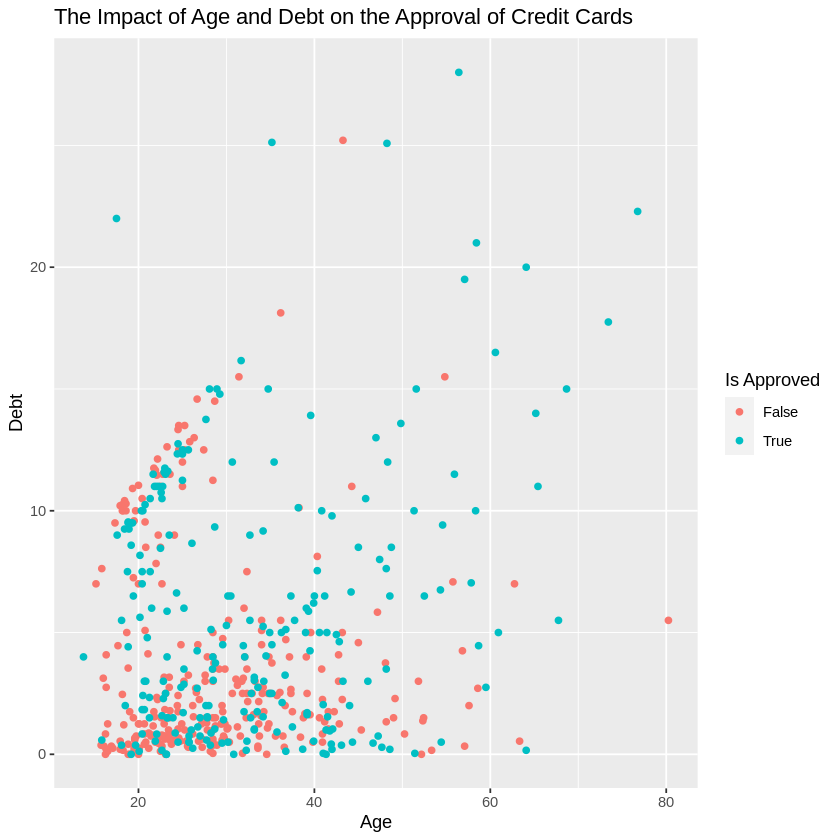

In [6]:
credit_plot <- credit_train |>
    ggplot(aes(x = Age, y = Debt, color = Approved)) +
    geom_point() +
    labs(title = "The Impact of Age and Debt on the Approval of Credit Cards", x = "Age", y = "Debt", color = "Is Approved")

credit_plot